In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model_age_gender = load_model('age_and_gender_model.h5')
model_expression = load_model('emotion_detection_model_50epochs.h5')

In [3]:
gender_dict = {0:'Male', 1:'Female'}
emotions = ['anger','disgust','fear','happiness','sadness','surprise','neutral']

In [4]:
def for_age_gender(img):
    image = load_img(img,color_mode='grayscale')
    image = np.resize(image,(128,128))
    image = np.array(image)/255
    image = image.reshape(1,128,128,1)
    return image

def for_facial_expression(img):
    image = load_img(img,color_mode='grayscale')
    image = np.resize(image,(48,48))
    image = np.array(image)/255
    image = image.reshape(1,48,48,1)
    plt.imshow(image.reshape(48,48,1))
    plt.axis('off')
    return image

def predict_age_gender(image):
    predict = model_age_gender.predict(image)
    pr_gn = gender_dict[round(predict[0][0][0])]
    pr_ag = round(predict[1][0][0])
    print('gender:',pr_gn, ' age:',pr_ag)

def predict_face_expression(image):
    predict = model_expression.predict(image)
    ar = predict
    print('emotion:',emotions[ar[0].argmax()])



1/1 [==============================] - 6s 6s/step
gender: Male  age: 44
1/1 [==============================] - 1s 716ms/step
emotion: anger


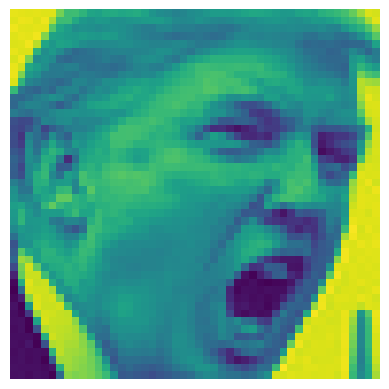

In [5]:
image_path = 'images/PrivateTest_33951605.jpg'
image = for_age_gender(image_path)
predict = predict_age_gender(image)

face_image = for_facial_expression(image_path)
predict_face = predict_face_expression(face_image)